In [13]:
# Load the libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
data, labels = iris.data, iris.target

# Split the dataset into training (80%) and testing (20%) sets
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, train_size=0.8, test_size=0.2, random_state=12
)

# Initialize and train the default KNN classifier
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels)

# Predict labels on training set
train_predictions = knn.predict(train_data)

# Print training predictions and accuracy
print("Predictions from the classifier:")
print(train_predictions)
print("Target values:")
print(train_labels)
print(f"Training Accuracy: {accuracy_score(train_labels, train_predictions) * 100:.2f}%")

# Initialize and train customized KNN classifier with specific parameters
custom_knn = KNeighborsClassifier(
    algorithm='auto',
    leaf_size=30,
    metric='minkowski',
    p=2,  # Equivalent to Euclidean distance
    n_jobs=1,
    n_neighbors=5,
    weights='uniform'
)
custom_knn.fit(train_data, train_labels)

# Predict labels on test set
test_predictions = custom_knn.predict(test_data)

# Print test accuracy
print(f"Testing Accuracy with Custom KNN: {accuracy_score(test_labels, test_predictions) * 100:.2f}%")


Predictions from the classifier:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 1 2 2 1
 1 1 2 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 2 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
Target values:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 2 2 2 1
 1 1 1 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 1 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
Training Accuracy: 97.50%
Testing Accuracy with Custom KNN: 96.67%



Results on Random Dataset:
Training Accuracy: 100.00%
Testing Accuracy: 100.00%


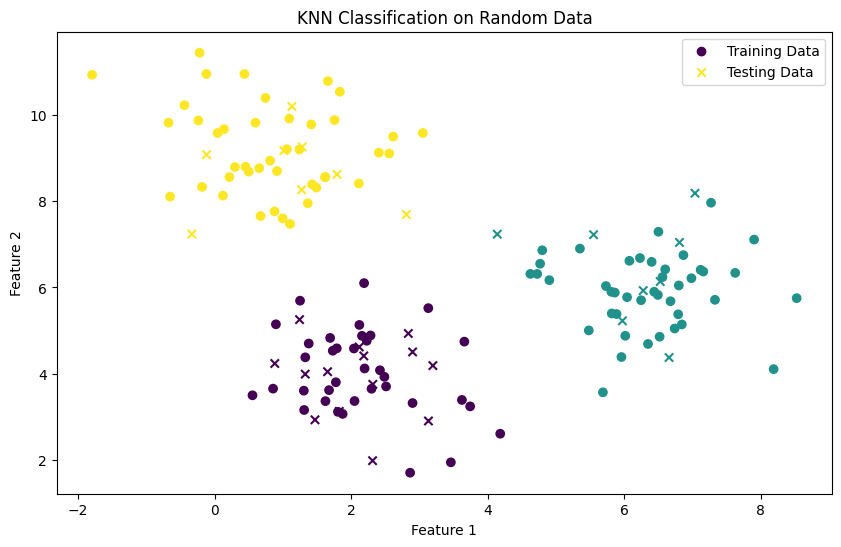

In [14]:
# Define cluster centers for data generation
cluster_centers = [[2, 4], [6, 6], [1, 9]]  # Locations of clusters
num_clusters = len(cluster_centers)

# Generate synthetic dataset
random_data, random_labels = make_blobs(n_samples=150, centers=np.array(cluster_centers), random_state=1)

# Split dataset into 80% training and 20% testing
X_train_sim, X_test_sim, y_train_sim, y_test_sim = train_test_split(
    random_data, random_labels, train_size=0.8, random_state=12
)

# Initialize and train KNN classifier
knn_random = KNeighborsClassifier(n_neighbors=5)
knn_random.fit(X_train_sim, y_train_sim)

# Predict labels for training and testing sets
train_preds_sim = knn_random.predict(X_train_sim)
test_preds_sim = knn_random.predict(X_test_sim)

# Compute and display accuracy scores
train_acc_sim = accuracy_score(y_train_sim, train_preds_sim)
test_acc_sim = accuracy_score(y_test_sim, test_preds_sim)

print("\nResults on Random Dataset:")
print(f"Training Accuracy: {train_acc_sim * 100:.2f}%")
print(f"Testing Accuracy: {test_acc_sim * 100:.2f}%")

# Visualizing training data and test predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_train_sim[:, 0], X_train_sim[:, 1], c=y_train_sim, marker='o', label='Training Data')
plt.scatter(X_test_sim[:, 0], X_test_sim[:, 1], c=test_preds_sim, marker='x', label='Testing Data')
plt.title('KNN Classification on Random Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
